In [1]:
#dossier de travail
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des individus actifs
import pandas as pd
X = pd.read_excel("loisirs_subset.xlsx",sheet_name="data")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7836 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reading          7836 non-null   object
 1   Listening_music  7836 non-null   object
 2   Cinema           7836 non-null   object
 3   Show             7836 non-null   object
 4   Exhibition       7836 non-null   object
 5   Computer         7836 non-null   object
 6   Sport            7836 non-null   object
 7   Walking          7836 non-null   object
 8   Travelling       7836 non-null   object
 9   Playing_music    7836 non-null   object
 10  Collecting       7836 non-null   object
 11  Volunteering     7836 non-null   object
 12  Mechanic         7836 non-null   object
 13  Gardening        7836 non-null   object
 14  Knitting         7836 non-null   object
 15  Cooking          7836 non-null   object
 16  Fishing          7836 non-null   object
 17  TV               7836 non-null   

# ACM sous scientisttools

In [2]:
# ACM
from scientisttools.decomposition import MCA

my_mca = MCA(n_components=2,
             row_labels=X.index,
             var_labels=X.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
             graph=False,
             figsize=(20,8))
my_mca.fit(X)

MCA(figsize=(20, 8), graph=False, n_components=2,
    row_labels=RangeIndex(start=0, stop=7836, step=1),
    var_labels=Index(['Reading', 'Listening_music', 'Cinema', 'Show', 'Exhibition',
       'Computer', 'Sport', 'Walking', 'Travelling', 'Playing_music',
       'Collecting', 'Volunteering', 'Mechanic', 'Gardening', 'Knitting',
       'Cooking', 'Fishing', 'TV'],
      dtype='object'))

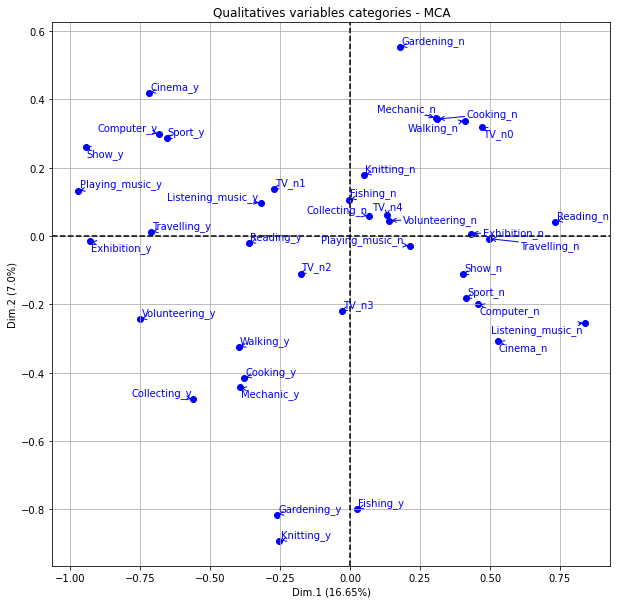

In [3]:
from scientisttools.pyplot import plotMCA
import matplotlib.pyplot as plt 

fig, axe =plt.subplots(figsize=(10,10))
plotMCA(my_mca,choice="mod",repel=True,ax=axe)
plt.show()

## Classification ascendante hiérarchique sur les modalités

In [4]:
from scientisttools.clustering import VARHCPC

# 
varhcpc = VARHCPC(n_clusters=3,
                  metric="euclidean",
                  method="ward",
                  parallelize=False)
# Instanciation
varhcpc.fit(my_mca)

VARHCPC(method='average', n_clusters=3)

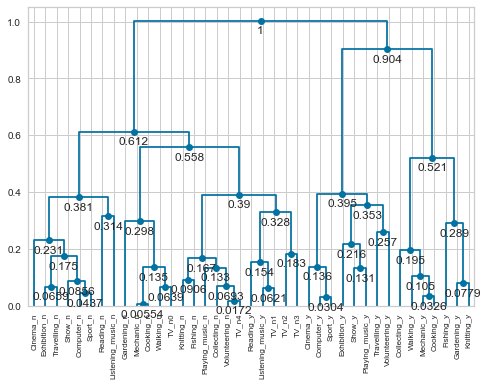

In [5]:
# Dendrogram
from scientisttools.pyplot import plot_dendrogram

plot_dendrogram(varhcpc,orientation='top',leaf_rotation=90,color_threshold=0)
plt.show()

In [6]:
varhcpc.cluster_centers_

,Dim.1,Dim.2
cluster,,
cluster_1,0.207735,0.052953
cluster_2,-0.773786,0.183254
cluster_3,-0.342149,-0.534016


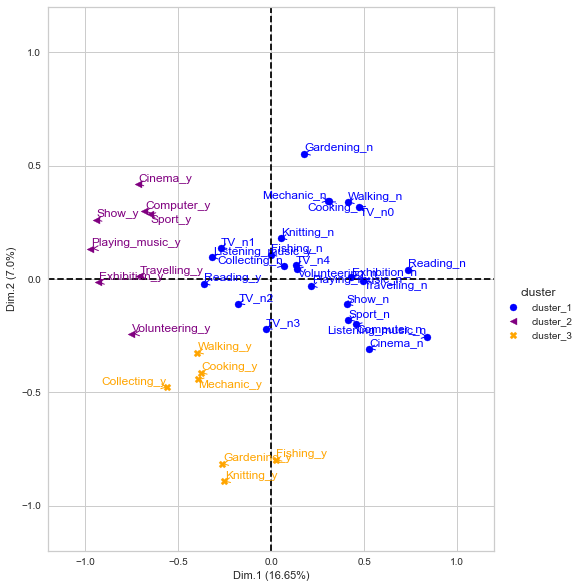

In [7]:
from scientisttools.pyplot import plotVARHCPC

fig,axe =plt.subplots(figsize=(10,10))
plotVARHCPC(varhcpc,ax=axe,xlim=(-1.2,1.2),ylim=(-1.2,1.2),repel=True,random_state=123,show_clust_cent=False)
plt.show()